In [1]:
# Importing libraries
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

# Downloading necessary NLTK datasets
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('train.csv')  # Replace with your actual file path


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Tokenization
        words = text.split()
        # Remove stopwords and apply stemming
        filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stopwords.words('english')]
        return " ".join(filtered_words)
    else:
        # Return empty string for non-string values
        return ""

# Apply preprocessing to the crime description column
df['cleaned_description'] = df['crimeaditionalinfo'].apply(preprocess_text)

In [5]:
# TF-IDF Vectorizer for text feature extraction
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the cleaned data and transform it
X = vectorizer.fit_transform(df['cleaned_description'])

# Labels: Assuming 'category' is the target variable
y = df['category']


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Model: Naive Bayes Classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7419768021063118


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                                       precision    recall  f1-score   support

                               Any Other Cyber Crime       0.35      0.28      0.31      3155
Child Pornography CPChild Sexual Abuse Material CSAM       0.00      0.00      0.00       103
                                Cryptocurrency Crime       0.80      0.03      0.06       128
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00      1128
                                     Cyber Terrorism       0.00      0.00      0.00        59
      Hacking  Damage to computercomputer system etc       0.44      0.09      0.15       511
                            Online Cyber Trafficking       0.00      0.00      0.00        53
                              Online Financial Fraud       0.83      0.91      0.87     17276
                            Online Gambling  Betting       0.00      0.00      0.00       155
               Online and Social Me

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Display evaluation metrics for performance
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7419768021063118


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                                       precision    recall  f1-score   support

                               Any Other Cyber Crime       0.35      0.28      0.31      3155
Child Pornography CPChild Sexual Abuse Material CSAM       0.00      0.00      0.00       103
                                Cryptocurrency Crime       0.80      0.03      0.06       128
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00      1128
                                     Cyber Terrorism       0.00      0.00      0.00        59
      Hacking  Damage to computercomputer system etc       0.44      0.09      0.15       511
                            Online Cyber Trafficking       0.00      0.00      0.00        53
                              Online Financial Fraud       0.83      0.91      0.87     17276
                            Online Gambling  Betting       0.00      0.00      0.00       155
               Online and Social Me

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Save the model and vectorizer for future use
import joblib

joblib.dump(model, 'crime_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [11]:
# Assuming the test file is named 'test_data.csv' and is provided by the hackathon
df_test = pd.read_csv('test.csv')  # Replace with the actual test file path

# Preprocessing the test data (same as the training data)
df_test['cleaned_description'] = df_test['crimeaditionalinfo'].apply(preprocess_text)

# Transform the test data using the trained TF-IDF vectorizer
X_test_final = vectorizer.transform(df_test['cleaned_description'])

# Use the trained model to make predictions on the test data
y_test_pred = model.predict(X_test_final)

# Assuming the test file contains the true labels (category) in a column 'category'
y_test_true = df_test['category']

# Evaluate the model on the test data
print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test_true, y_test_pred))


Test Accuracy: 0.7359185372570367


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Classification Report:
                                                       precision    recall  f1-score   support

                               Any Other Cyber Crime       0.35      0.26      0.30      3670
Child Pornography CPChild Sexual Abuse Material CSAM       0.00      0.00      0.00       123
                      Crime Against Women & Children       0.00      0.00      0.00         4
                                Cryptocurrency Crime       0.62      0.03      0.06       166
                      Cyber Attack/ Dependent Crimes       1.00      1.00      1.00      1261
                                     Cyber Terrorism       0.00      0.00      0.00        52
      Hacking  Damage to computercomputer system etc       0.40      0.07      0.12       592
                            Online Cyber Trafficking       0.00      0.00      0.00        61
                              Online Financial Fraud       0.82      0.91      0.87     18896
                            On

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


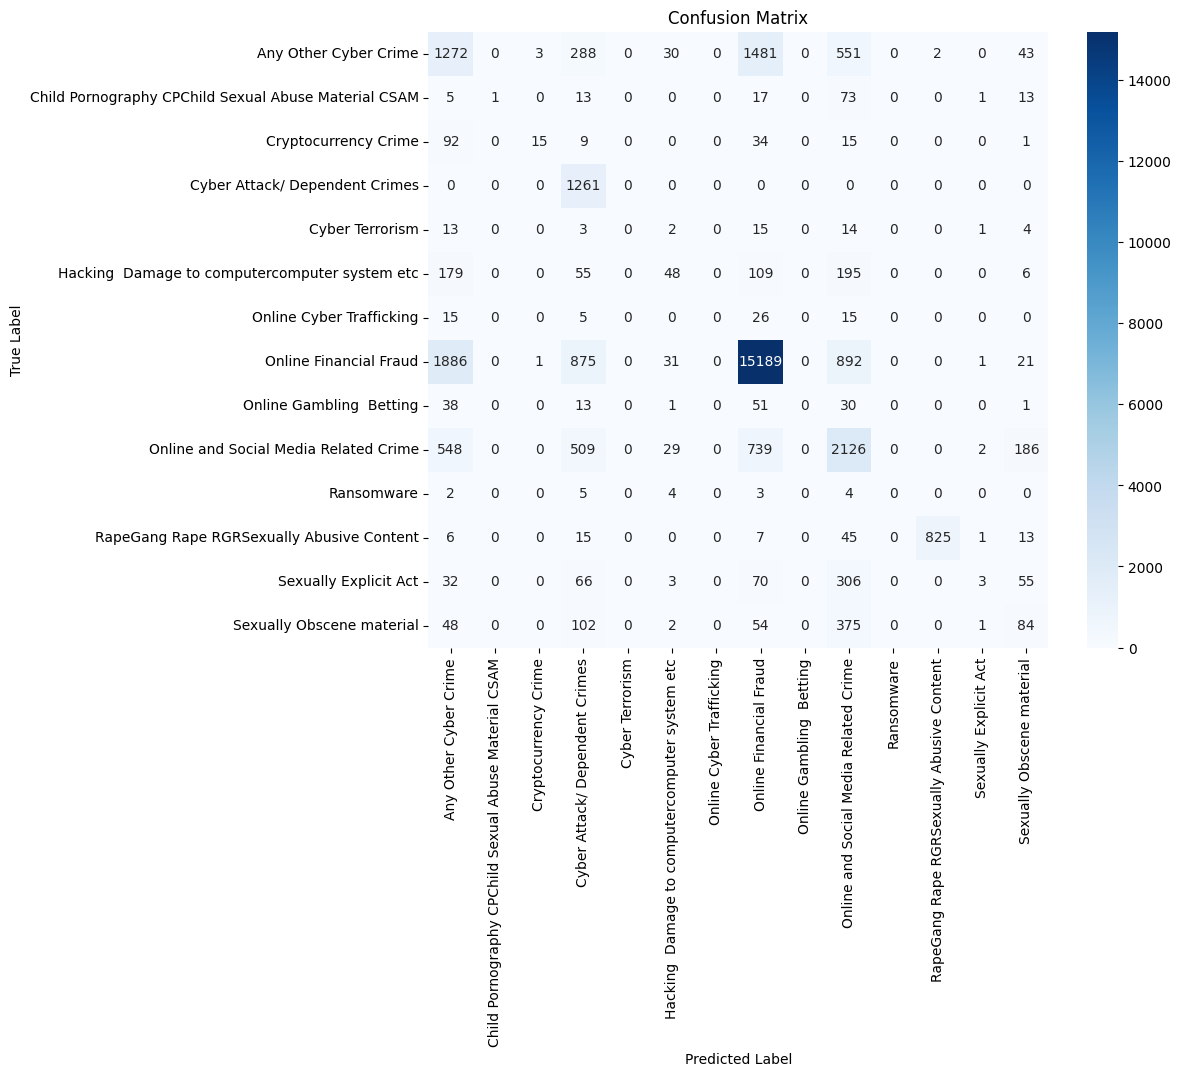

In [14]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load your trained model and vectorizer
model = joblib.load('crime_model.pkl')
vectorizer = joblib.load('vectorizer.pkl')

# Load the test data from the CSV file
test_data = pd.read_csv('test.csv')  # Adjust the path if necessary

# Handle missing values in the 'crimeaditionalinfo' column
test_data['crimeaditionalinfo'] = test_data['crimeaditionalinfo'].fillna('No description')

# Extract the relevant columns
test_crimes = test_data['crimeaditionalinfo'].values  # Crime descriptions
true_labels = test_data['category'].values  # True labels (categories)

# Transform the test data using the vectorizer and predict the categories using the model
predicted_labels = model.predict(vectorizer.transform(test_crimes))

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=model.classes_)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
